In [10]:
import praw
user_agent = 'Reddit_Scrapper 1.0 by /u/Active_Break9385'
reddit = praw.Reddit(
 client_id='NA59w4_hCCHW0tjzde1Alg',
 client_secret='lDpXKHai-zypU6_fs1KB9c0oiQmF5g',
 user_agent=user_agent
)

In [11]:
import pandas as pd
import numpy as np
import re

In [ ]:
# Create an empty list to store each row
comments_data = []

subreddit = reddit.subreddit("jerseycity")  # Change to your subreddit of choice
for submission in subreddit.new(limit=1000):  # You can change the limit
    submission.comments.replace_more(limit=0)  # To flatten comment tree and remove 'MoreComments' objects
    for comment in submission.comments.list():
        comments_data.append({
            'Post_ID': submission.id,
            'Post_Title': submission.title,
            'Comment_ID': comment.id,
            'Comment_Body': comment.body,
            'Comment_Author': str(comment.author),
            'Score': comment.score,
            'Created': comment.created_utc
        })

comments_df = pd.DataFrame(comments_data)
comments_df.head()




""


In [8]:
subjects = ["mayor", "mussab", "ali", "boe"]
filtered_df = pd.DataFrame()

for subject in subjects:
    matches = comments_df[comments_df['Comment_Body'].str.lower().str.contains(subject.lower(), na=False)]
    filtered_df = pd.concat([filtered_df, matches], ignore_index=True)

filtered_df

,Post_ID,Post_Title,Comment_ID,Comment_Body,Comment_Author,Score,Created
0,1kj8ani,ICE Agents Assaulted Members of Congress at De...,mrmpeso,Assuming you mean James (Solomon). Both he and...,nuncio_populi,1,1.746903e+09
1,1kj01f7,"Plainly put, I’m furious about Mayor (& Gubern...",mrj60y6,"Saw other politicians there, including NYC may...",JournalSquire,38,1.746847e+09
2,1kj01f7,"Plainly put, I’m furious about Mayor (& Gubern...",mrjjq0y,>NYC mayoral candidate Mamdani who took the PA...,DrixxYBoat,13,1.746854e+09
3,1kj01f7,"Plainly put, I’m furious about Mayor (& Gubern...",mrj7hbs,May be he was making sure that the next govern...,lorenipsum2023,-17,1.746848e+09
4,1kj01f7,"Plainly put, I’m furious about Mayor (& Gubern...",mrjjuvm,>If he broke the law then he deserved to get a...,DrixxYBoat,8,1.746854e+09
...,...,...,...,...,...,...,...
66,1khpl1w,"soo the path is suspended this AM, EWRs a shit...",mrb4haf,Late stage capitalism.,rubensinclair,8,1.746737e+09
67,1khpl1w,"soo the path is suspended this AM, EWRs a shit...",mr9hc3b,Dude! TIL. That's actually a fascinating fac...,bodhipooh,16,1.746719e+09
68,1khpbky,"Let me guess, the PATH is down?",mrbb08i,PATH down. EWR not safe to fly from. NJT a shi...,Initial_Height7162,1,1.746739e+09
69,1khpbky,"Let me guess, the PATH is down?",mr8ws6f,"Why? JSQ looks pretty European, brutalism was ...",NewNewark,1,1.746713e+09


In [6]:
import re

def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)            # Remove mentions
    text = re.sub(r'https?:\/\/\S+', '', text)            # Remove URLs
    text = re.sub(r'#', '', text)                         # Remove hashtag symbol
    text = re.sub(r'\n', ' ', text)                       # Remove newlines
    text = re.sub(r':', '', text)                         # Remove colons
    return text

filtered_df['Clean_Comment'] = filtered_df['Comment_Body'].apply(clean_text)


/var/folders/vm/_ljljg3d2ln_x5m_sd3t34kr0000gn/T/ipykernel_98749/2157465082.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Clean_Comment'] = filtered_df['Comment_Body'].apply(clean_text)


In [7]:
from textblob import TextBlob

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

def get_sentiment_category(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

filtered_df['Subjectivity'] = filtered_df['Clean_Comment'].apply(get_subjectivity)
filtered_df['Polarity'] = filtered_df['Clean_Comment'].apply(get_polarity)
filtered_df['Sentiment'] = filtered_df['Polarity'].apply(get_sentiment_category)

filtered_df.head()


/var/folders/vm/_ljljg3d2ln_x5m_sd3t34kr0000gn/T/ipykernel_98749/3780450530.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Subjectivity'] = filtered_df['Clean_Comment'].apply(get_subjectivity)
/var/folders/vm/_ljljg3d2ln_x5m_sd3t34kr0000gn/T/ipykernel_98749/3780450530.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Polarity'] = filtered_df['Clean_Comment'].apply(get_polarity)
/var/folders/vm/_ljljg3d2ln_x5m_sd3t34kr0000gn/T/ipykernel_98749/3780450530.py:19: SettingWithCo

,Post_ID,Post_Title,Comment_ID,Comment_Body,Comment_Author,Score,Created,Clean_Comment,Subjectivity,Polarity,Sentiment
0,1k7vzro,Pizza delivery that’s not uber eats/ DoorDash?,mp1fuxx,Krispy Pizza has their own drivers,DeepFried328,1,1.745616e+09,Krispy Pizza has their own drivers,1.000000,0.600000,Positive
1,1k7vzro,Pizza delivery that’s not uber eats/ DoorDash?,mp1ie6c,I like to use the slice app. App friendly but ...,goddam_sachs,1,1.745617e+09,I like to use the slice app. App friendly but ...,0.300000,0.158333,Positive
2,1k7vzro,Pizza delivery that’s not uber eats/ DoorDash?,mp1j03m,Larry and Joes or Pizza Masters (do the vodka ...,rudotri,1,1.745617e+09,Larry and Joes or Pizza Masters (do the vodka ...,0.400000,0.100000,Positive
17,1k7ukh4,Best of JC Bites?,mp1h8vm,Welcome to the heights! Absolutely seconding D...,At_Dril,1,1.745616e+09,Welcome to the heights! Absolutely seconding D...,0.896296,0.316667,Positive


IndexError: index 0 is out of bounds for axis 0 with size 0

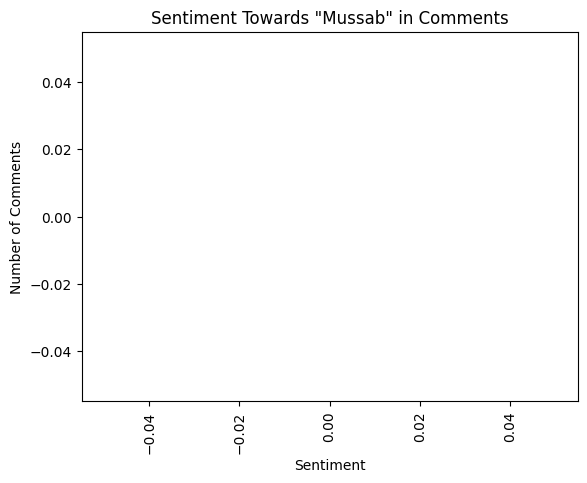

In [ ]:
import matplotlib.pyplot as plt

plt.title(f'Sentiment Towards "{subject.capitalize()}" in Comments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
filtered_df['Sentiment'].value_counts().plot(kind='bar', color='#2078B4')
plt.show()
